# CNN implementation as mentioned in "A deep learning approach for person identification using ear biometrics" paper

### Link to paper: https://doi.org/10.1007/s10489-020-01995-8

In [59]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization as BN, Dense, Rescaling
from tensorflow.keras.models import Sequential


ROOT_DIR = os.getcwd()

## IITD Dataset

In [2]:
batch_size = 32
img_height, img_width = 180, 50
epochs = 100

In [3]:
train_ds, test_ds = image_dataset_from_directory(
    os.path.join(os.getcwd(), 'IITD'),
    label_mode='categorical',
    validation_split=0.3,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1586 files belonging to 221 classes.
Using 1111 files for training.
Using 475 files for validation.


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], shape=(221,), dtype=float32)


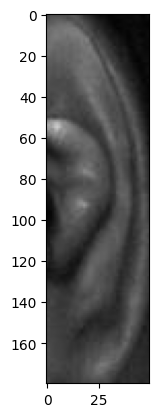

In [4]:
for data, lbl in train_ds.take(1):
    plt.imshow(np.uint64(data[0]))
    print(lbl[0])

In [5]:
model = Sequential()

# Convolution Layer 1
model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 2
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 4
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 5
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 6
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(221, activation='softmax'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 50, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 180, 50, 8)        224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 25, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 25, 16)        1168      
                                                                 
 batch_normalization (BatchN  (None, 90, 25, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 12, 16)       0

In [7]:
rmsProp = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history = model.fit(train_ds, epochs=epochs) # , validation_data = test_ds)

Epoch 1/100
35/35 [==============================] - 10s 242ms/step - loss: 5.5854 - accuracy: 0.0612
Epoch 2/100
35/35 [==============================] - 7s 200ms/step - loss: 2.8739 - accuracy: 0.3519
Epoch 3/100
35/35 [==============================] - 7s 203ms/step - loss: 0.8559 - accuracy: 0.8011
Epoch 4/100
35/35 [==============================] - 7s 202ms/step - loss: 0.3248 - accuracy: 0.9172
Epoch 5/100
35/35 [==============================] - 7s 199ms/step - loss: 0.1634 - accuracy: 0.9721
Epoch 6/100
35/35 [==============================] - 7s 201ms/step - loss: 0.0893 - accuracy: 0.9775
Epoch 7/100
35/35 [==============================] - 7s 200ms/step - loss: 0.0498 - accuracy: 0.9901
Epoch 8/100
35/35 [==============================] - 7s 200ms/step - loss: 0.0561 - accuracy: 0.9838
Epoch 9/100
35/35 [==============================] - 7s 199ms/step - loss: 0.0234 - accuracy: 0.9973
Epoch 10/100
35/35 [==============================] - 8s 210ms/step - loss: 0.0552 - accur

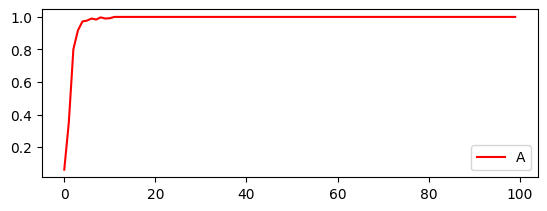

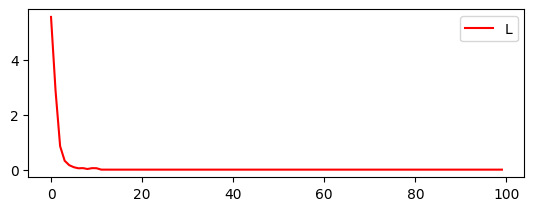

In [9]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], color='red')
plt.legend('Accuracy')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], color='red')
plt.legend('Loss')
plt.show()

In [10]:
model.evaluate(test_ds)

15/15 [==============================] - 2s 128ms/step - loss: 0.1310 - accuracy: 0.9747


[0.13100188970565796, 0.9747368693351746]

## AMI Dataset

In [53]:
batch_size = 32
img_height, img_width = 176, 123
epochs = 100

In [60]:
os.chdir(ROOT_DIR)
train_ds, test_ds = image_dataset_from_directory(
    os.path.join(os.getcwd(), 'AMI'),
    label_mode='categorical',
    validation_split=0.3,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1348 files belonging to 100 classes.
Using 944 files for training.
Using 404 files for validation.


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], shape=(100,), dtype=float32)


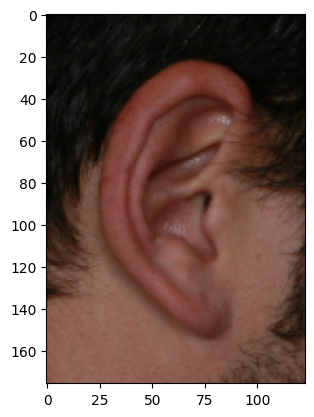

In [61]:
for data, lbl in train_ds.take(1):
    plt.imshow(np.uint64(data[0]))
    print(lbl[0])

In [62]:
model = Sequential()

# Convolution Layer 1
model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 2
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 3
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 4
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 5
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution Layer 6
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
model.add(BN())

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(100, activation='softmax'))

In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 176, 123, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 176, 123, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 88, 61, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 88, 61, 16)        1168      
                                                                 
 batch_normalization_3 (Batc  (None, 88, 61, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 30, 16)      

In [64]:
rmsProp = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
history = model.fit(train_ds, epochs=epochs) # , validation_data = test_ds)

Epoch 1/100
30/30 [==============================] - 16s 461ms/step - loss: 7.9289 - accuracy: 0.0784
Epoch 2/100
30/30 [==============================] - 13s 431ms/step - loss: 3.6829 - accuracy: 0.2945
Epoch 3/100
30/30 [==============================] - 13s 430ms/step - loss: 1.8774 - accuracy: 0.5794
Epoch 4/100
30/30 [==============================] - 13s 432ms/step - loss: 1.0607 - accuracy: 0.7394
Epoch 5/100
30/30 [==============================] - 14s 438ms/step - loss: 0.4473 - accuracy: 0.8824
Epoch 6/100
30/30 [==============================] - 14s 456ms/step - loss: 0.2828 - accuracy: 0.9195
Epoch 7/100
30/30 [==============================] - 14s 440ms/step - loss: 0.1057 - accuracy: 0.9693
Epoch 8/100
30/30 [==============================] - 13s 434ms/step - loss: 0.2113 - accuracy: 0.9354
Epoch 9/100
30/30 [==============================] - 14s 437ms/step - loss: 0.1676 - accuracy: 0.9619
Epoch 10/100
30/30 [==============================] - 14s 438ms/step - loss: 0.135

30/30 [==============================] - 15s 493ms/step - loss: 3.4418e-06 - accuracy: 1.0000
Epoch 79/100
30/30 [==============================] - 14s 460ms/step - loss: 3.6139e-06 - accuracy: 1.0000
Epoch 80/100
30/30 [==============================] - 15s 501ms/step - loss: 3.0901e-06 - accuracy: 1.0000
Epoch 81/100
30/30 [==============================] - 14s 463ms/step - loss: 3.6432e-06 - accuracy: 1.0000
Epoch 82/100
30/30 [==============================] - 15s 470ms/step - loss: 3.4810e-06 - accuracy: 1.0000
Epoch 83/100
30/30 [==============================] - 15s 490ms/step - loss: 3.2950e-06 - accuracy: 1.0000
Epoch 84/100
30/30 [==============================] - 15s 468ms/step - loss: 3.1278e-06 - accuracy: 1.0000
Epoch 85/100
30/30 [==============================] - 14s 467ms/step - loss: 3.1802e-06 - accuracy: 1.0000
Epoch 86/100
30/30 [==============================] - 15s 482ms/step - loss: 3.1701e-06 - accuracy: 1.0000
Epoch 87/100
30/30 [==============================

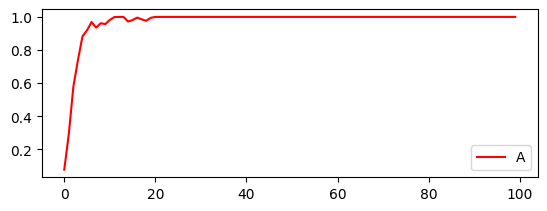

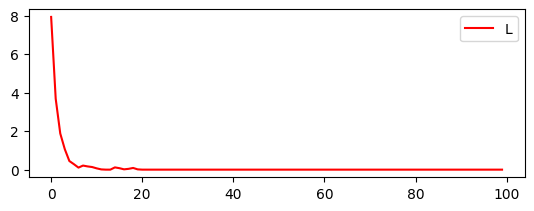

In [66]:
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], color='red')
plt.legend('Accuracy')
plt.show()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], color='red')
plt.legend('Loss')
plt.show()

In [67]:
model.evaluate(test_ds)

13/13 [==============================] - 3s 182ms/step - loss: 0.9246 - accuracy: 0.9010


[0.9245625734329224, 0.9009901285171509]

## Testing adversarial attack using stickers

In [76]:
# importing PIL
from PIL import Image

os.chdir(ROOT_DIR)
os.chdir('adversarial_images')
os.getcwd()

'C:\\Users\\HK Joshi\\Documents\\Github\\major_project\\adversarial_images'

In [77]:
imgs, labels = [], []
for file in os.listdir():
    file_name = file.split('_')
    file_name
    
    # Adversarial patch image
    img_data = tf.keras.utils.load_img('_'.join(file_name), target_size=(img_height, img_width), keep_aspect_ratio=True)

    # Clean Image
    # img_data = tf.keras.utils.load_img('000_zoom_ear.jpg', target_size=(img_height, img_width))
    # img_data = tf.keras.utils.load_img('000_zoom_ear_rot.jpg', target_size=(img_height, img_width))

    array = tf.keras.utils.img_to_array(img_data)
    img = np.expand_dims(img_data, axis = 0)
    # plt.imshow(img[0])
    # plt.axis('off')
    # plt.title(file_name[0])
    # plt.show()
    imgs.append(img)
    labels.append(file_name[0])

In [78]:
np.array(imgs).shape

(26, 1, 176, 123, 3)

In [79]:
preds = []
for img in imgs:
    pred = model.predict(img).argmax()
#     pred.argmax()
    preds.append(pred)

1/1 [==============================] - 0s 50ms/step


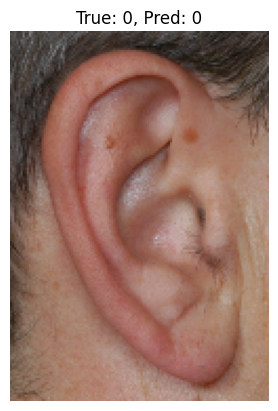

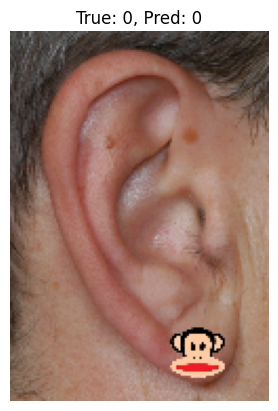

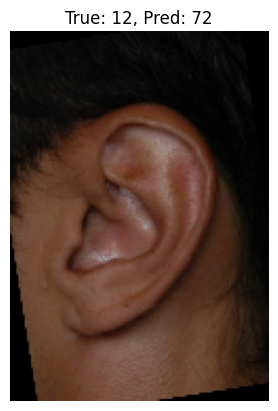

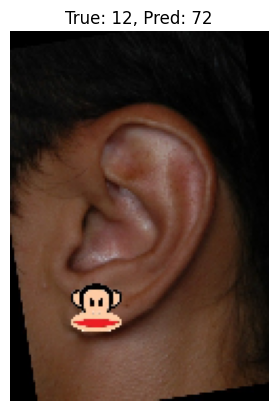

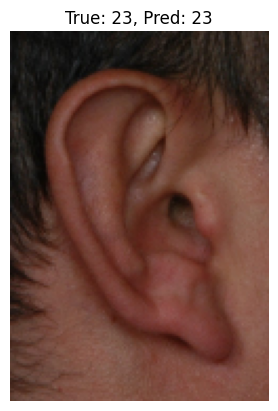

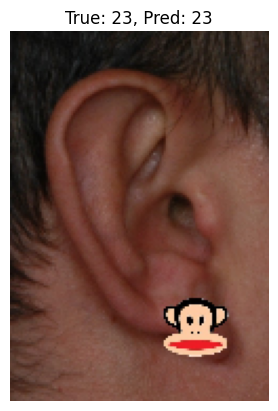

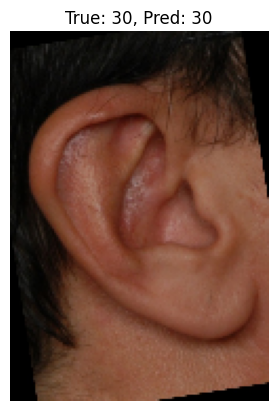

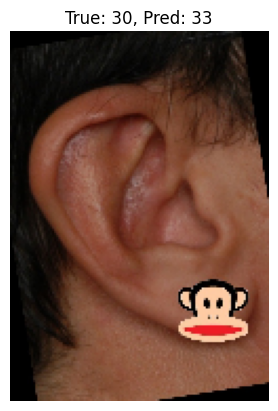

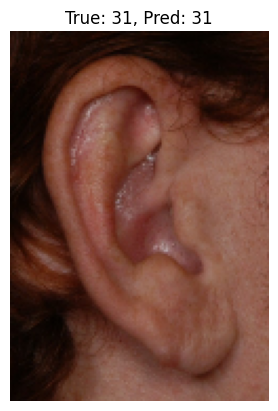

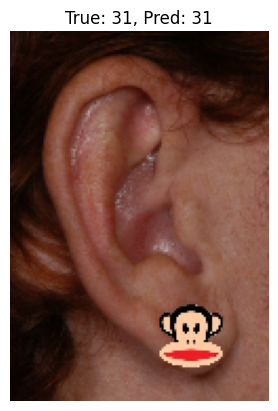

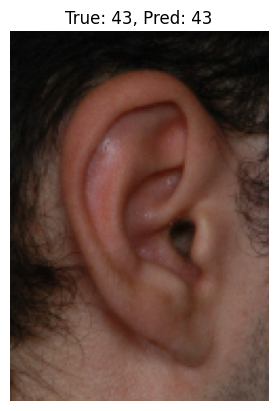

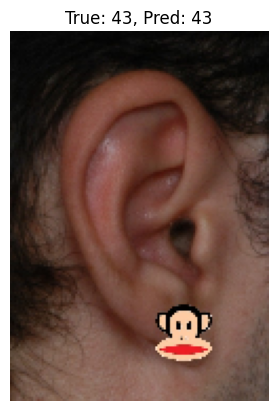

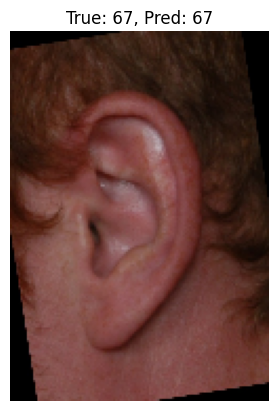

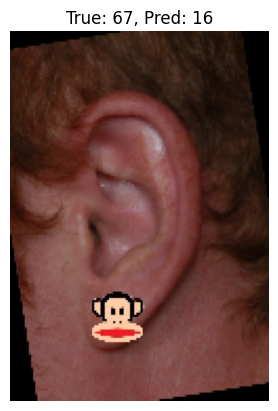

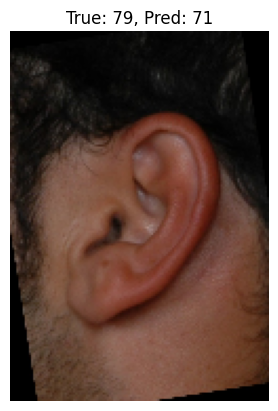

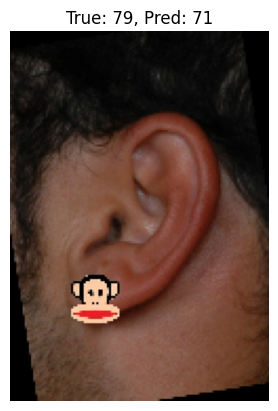

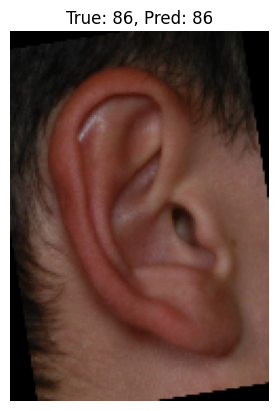

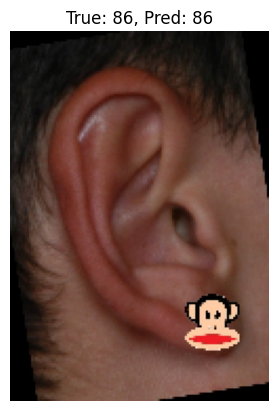

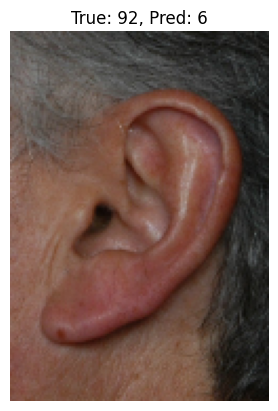

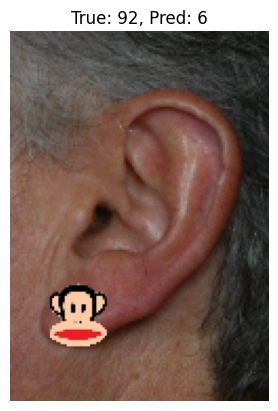

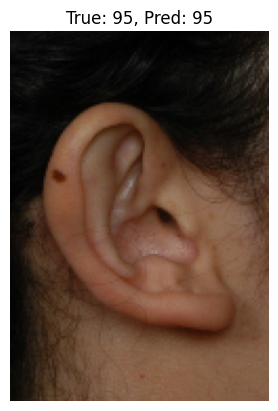

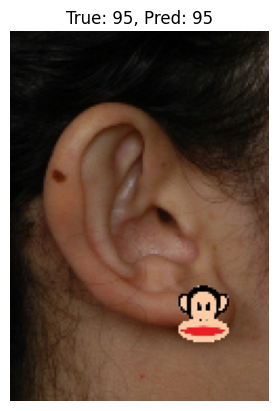

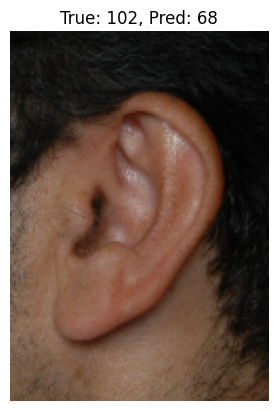

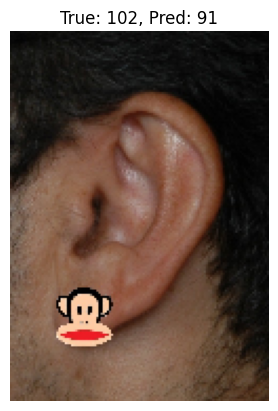

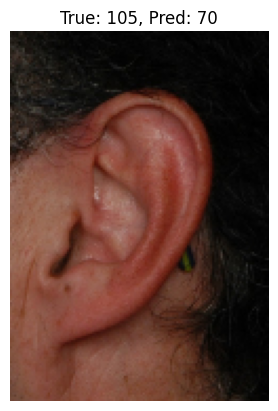

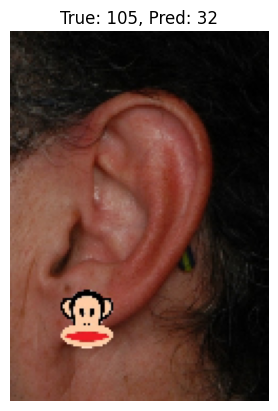

In [84]:
for img, label, pred in zip(imgs, labels, preds):
    plt.imshow(img[0])
    plt.axis('off')
    plt.title(f'True: {int(label)}, Pred: {pred}')
    plt.show()


23